# Introduction

In this capstone project, my purpose is to implement different recommenders for Sephora and try to decide the most suitable recommmeder for it. As we all know, the recommender system now is very popular and useful to help companies to boost revenues and also provide customers better services. So understanding the whole process of how to build a good recommender and know their advantages, disadvantages and differnce ae really important for us to perform our data scientist role.

I get my dataset from Github, which I have provided the link below. it contains two parts, the customer data and the products information data. below is the features:

'Username', 'Skin_Tone', 'Skin_Type', 'Eye_Color', 'Hair_Color','Rating_Stars', 'Review', 'Product', 'Brand', 'Price', 'Rating','Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive','Category', 'Product_Url', 'User_id', 'Product_id','Ingredients_Cleaned', 'Review_Cleaned', 'Good_Stuff', 'Ing_Tfidf'.


I have four recommenders in total: simple recommender, content based recommender, collaborative filtering recommender, and hybrid recommender. the first simple recommender focus on the most popular products for r=each category. we can use it to get the most common products that customer like and recommend to customers. for the content based, i use the TF-IDF to tokenize it's ingredients and get the most silimar products according to their ingredients and recommede the most similar products to custiomers with the product that they have bought before. for the Collaborative filtering, it contaiins two types, the first one is the user based which I focus on the costomer features like the skin, eye color and hair color status. I assume thta the people have the same status may share the similar products, so i can recommed the poducts to target customer according to the customers who have the same status with her/him. for the item based recommender, I use the KNN algorithm to find the top nearst neighour items which means they may be more similar, and recommend these procuts. finally, for the hybrid recommender, I combine the content based and the collaborative filtering together to consider the user and item information togehter and recommend the products. in this recommender, it seems more accurate and helps to overcome some problems that the separate content and CF recommender have, like the cold start and sparcity issues. So finally I will suggest to use the hybrid recommender for the Sephora.

In [ ]:
# import the basic libraries

import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# read datasource from Github
df = pd.read_csv("https://raw.githubusercontent.com/XIAOJIA68/Recommedation-System/main/Data%20sources/skindataall.csv",header=0)

# To display the top 5 rows

df.head()


Unnamed: 0  ...                                          Ing_Tfidf
0           0  ...  sodium, cocoyl, glutamate, cocamidopropyl, bet...
1           1  ...  sodium, cocoyl, glutamate, cocamidopropyl, bet...
2           2  ...  sodium, cocoyl, glutamate, cocamidopropyl, bet...
3           3  ...  sodium, cocoyl, glutamate, cocamidopropyl, bet...
4           4  ...  sodium, cocoyl, glutamate, cocamidopropyl, bet...

[5 rows x 26 columns]

# Exploratory Data Analysis
1. Data exploration:

>.shape returns the number of rows by the number of columns for the dataset.

>.describe() summarizes the count, mean, standard deviation, min, and max for numeric variables.

>.dtypes identifies the Data Types.

>.nunique() returns the number of unique values for each variable.

>.isnull().sum() checks missing values for each column.

>.count() returns the count for each variable.

In [ ]:
# get all the column names

print(df.shape)
print(list(df.columns))

(8649, 26)
['Unnamed: 0', 'Username', 'Skin_Tone', 'Skin_Type', 'Eye_Color', 'Hair_Color', 'Rating_Stars', 'Review', 'Product', 'Brand', 'Price', 'Rating', 'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Category', 'Product_Url', 'User_id', 'Product_id', 'Ingredients_Cleaned', 'Review_Cleaned', 'Good_Stuff', 'Ing_Tfidf']


In [ ]:
# drop the Unnamed column since it doesn't have any meaning 

df = df.drop(columns = ['Unnamed: 0'])
df

Username  ...                                          Ing_Tfidf
0         allyp3  ...  sodium, cocoyl, glutamate, cocamidopropyl, bet...
1         PatTea  ...  sodium, cocoyl, glutamate, cocamidopropyl, bet...
2       Sabi1991  ...  sodium, cocoyl, glutamate, cocamidopropyl, bet...
3     happyface2  ...  sodium, cocoyl, glutamate, cocamidopropyl, bet...
4       kimkix34  ...  sodium, cocoyl, glutamate, cocamidopropyl, bet...
...          ...  ...                                                ...
8644   Tinkfairy  ...  dicaprylyl, carbonate, niacinamide, cetyl, alc...
8645    baeyonce  ...  dicaprylyl, carbonate, niacinamide, cetyl, alc...
8646      JustJC  ...  dicaprylyl, carbonate, niacinamide, cetyl, alc...
8647     Latchmi  ...  dicaprylyl, carbonate, niacinamide, cetyl, alc...
8648      xc1148  ...  dicaprylyl, carbonate, niacinamide, cetyl, alc...

[8649 rows x 25 columns]

In [ ]:
print(list(df.columns))

['Username', 'Skin_Tone', 'Skin_Type', 'Eye_Color', 'Hair_Color', 'Rating_Stars', 'Review', 'Product', 'Brand', 'Price', 'Rating', 'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Category', 'Product_Url', 'User_id', 'Product_id', 'Ingredients_Cleaned', 'Review_Cleaned', 'Good_Stuff', 'Ing_Tfidf']


In [ ]:
#Identify the Data Types
df_info = pd.DataFrame(df.dtypes,columns=['Dtype'])

#Identify the unique values
df_info['Nunique'] = df.nunique()

#check missing values for each column
df_info['MissingValues']=df.isnull().sum()

# Identify the count for each variable
df_info['Count']=df.count()

# Identify the zero values for each variable
df_info['ZeroValues']=(df==0).sum()

# how many '?' values
df_info['?Values']=(df=='?').sum()

df_info

Dtype  Nunique  ...  ZeroValues  ?Values
Username              object     6851  ...           0        0
Skin_Tone             object       10  ...           0        0
Skin_Type             object        5  ...           0        0
Eye_Color             object        6  ...           0        0
Hair_Color            object        7  ...           0        0
Rating_Stars           int64        5  ...           0        0
Review                object     7496  ...           0        0
Product               object      315  ...           0        0
Brand                 object       60  ...           0        0
Price                  int64       81  ...           0        0
Rating               float64       18  ...          70        0
Ingredients           object      299  ...           0        0
Combination            int64        2  ...        2927        0
Dry                    int64        2  ...        3737        0
Normal                 int64        2  ...        3140        0
Oily                   int64        2  ...        3307        0
Sensitive              int64        2  ...        4192        0
Category              object        4  ...           0        0
Product_Url           object      315  ...           0        0
User_id                int64     6851  ...           1        0
Product_id             int64      315  ...          24        0
Ingredients_Cleaned   object      299  ...           0        0
Review_Cleaned        object     7495  ...           0        0
Good_Stuff             int64        2  ...        3293        0
Ing_Tfidf             object      299  ...           0        0

[25 rows x 6 columns]

 There is no missing value, because they have been filled with 'no data' string
 
 Some columns have large mount of zero values including product_id column, which seems unreliable. I will pay more attention to them later.
 
In this case, although we have lots of numerical columns like User_id, Product_id etc, but it seems that them are more reasonable to be categorical data. So i may do some data transformation later.

### check the distribution for features 
 


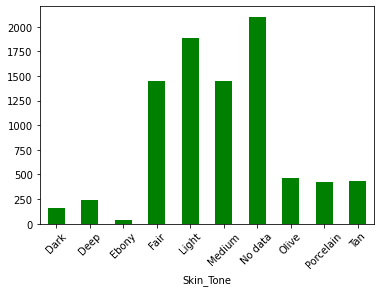

In [ ]:
# check the distribution of skintone

skintone = df.groupby('Skin_Tone')['Username'].count()
skintone.plot.bar(color = 'green', rot=45)

<AxesSubplot:xlabel='Skin_Type'>

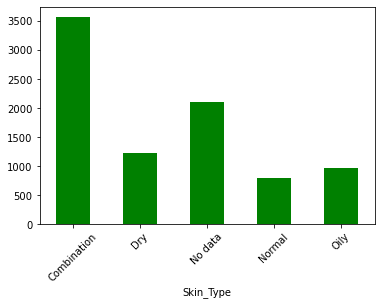

In [ ]:
# check the distribution of skintype

skintype = df.groupby('Skin_Type')['Username'].count()
skintype.plot.bar(color = 'green', rot=45)

There are more than 2000 rows missing skintone values. Considering I only have 8649 rows, I will try to impute these data.

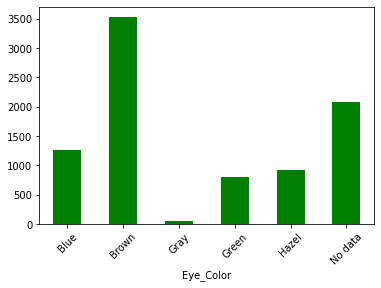

In [ ]:
# check the distribution of eyecolor

eyecolor = df.groupby('Eye_Color')['Username'].count()
eyecolor.plot.bar(color = 'green', rot=45)

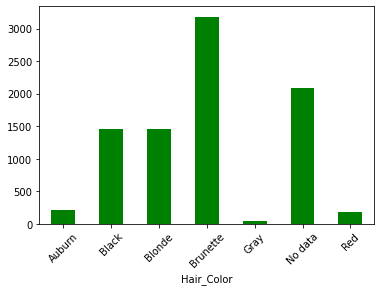

In [ ]:
# check the distribution of haircolor

haircolor = df.groupby('Hair_Color')['Username'].count()
haircolor.plot.bar(color = 'green', rot=45)

<AxesSubplot:xlabel='Category'>

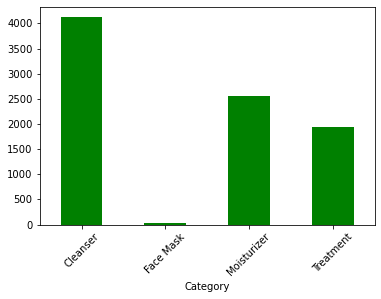

In [ ]:
# check the distribution of Category

Category = df.groupby('Category')['Username'].count()
Category.plot.bar(color = 'green', rot=45)

<AxesSubplot:xlabel='Rating_Stars'>

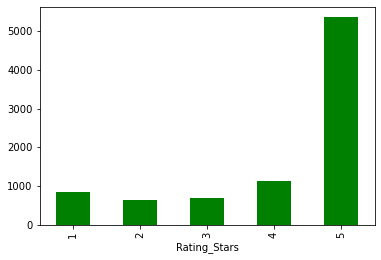

In [ ]:
# check the distribution of rating

rating = df.groupby('Rating_Stars')['Username'].count()
rating.plot.bar(color = 'green')

Findings:

>There are many rows having missing values with 'no data' in skintype, skintone, eyecolor and haircolor columns. Considering I only have 8649 rows, I will try to impute these data.

>Fortunately, we don't see any missing values in the rating column. But the ratings are unevenly distributed and have big difference as rating 5 is much higher that others in reality, but we may expect to see more balanced ratings in this case. This situation does make sense that customers mostly write reviews when they are happy with the product. 


# Recommendation System

### Simple Recommender
The Simple Recommender offers generalized recommnendations to every category product based on product popularity. The basic idea behind this recommender is that products in that category that are more popular will have a higher probability of being liked by the average cutomers. This model does not give personalized recommendations based on the customer.

The implementation of this model is extremely trivial. All I have to do is sort our products based on ratings in different category and display the top 10 products on our list. At first I will pass a category argument to distinguish each of them and get the top products for every particular category.

In [ ]:
# group by the product and sort their counts in descending order
# get the top 10 recommender products for the Cleanser

df_grouped1 =  df[df['Category']== 'Cleanser'].groupby('Product').size().reset_index(name='count').sort_values('count',ascending=False)
df_grouped1[['Product']].head(10)

Product
113                     Superfood Antioxidant Cleanser
114                    Take The Day Off Cleansing Balm
23         Calendula Herbal Extract Alcohol Free Toner
123              The Rice Polish Foaming Enzyme Powder
25               Checks and Balances™ Frothy Face Wash
26                                 Clarifying Cleanser
117                  The Clean Truth™ Foaming Cleanser
33                       Cleansing & Exfoliating Wipes
115  Take The Day Off Makeup Remover For Lids, Lash...
35                  Cleansing Spa Water Makeup Remover

In [ ]:
# group by the product and sort their counts in descending order
# get the top 10 recommender products for the Moisturizer

df_grouped2 =  df[df['Category']== 'Moisturizer'].groupby('Product').size().reset_index(name='count').sort_values('count',ascending=False)
df_grouped2[['Product']].head(10)

Product
7                                       Beauty Elixir
91  Wrinkle Warrior™ 2-in-1 Plumping Moisturizer +...
68                     Take The Day Off Cleansing Oil
66                      Squalane + Vitamin C Rose Oil
64               Squalane + Antioxidant Cleansing Oil
63   Skin Perfecting Lotion - Blemish Prone/Oily Skin
20                         Daily Reviving Concentrate
34                            Hungarian Water Essence
15                                       Coconut Melt
58                                  Rose Floral Toner

In [ ]:

# group by the product and sort their counts in descending order
# get the top 10 recommender products for the Face Mask

df_grouped3 =  df[df['Category']== 'Face Mask'].groupby('Product').size().reset_index(name='count').sort_values('count',ascending=False)
df_grouped3[['Product']].head(10)

Product
0  Time Freeze Sleeping Mask

In [ ]:
# group by the product and sort their counts in descending order
# get the top 10 recommender products for the Treatment

df_grouped4 =  df[df['Category']== 'Treatment'].groupby('Product').size().reset_index(name='count').sort_values('count',ascending=False)
df_grouped4[['Product']].head(10)

Product
0                         +Retinol Vita C Power Serum
51                      Post-Acne Spot Lightening Gel
59                   Rapid Relief Acne Spot Treatment
58                            Rapid Collagen Infusion
57        Rapid Age Spot and Pigment Lightening Serum
56              R.N.A. POWER Anti-Aging Essence Serum
55           Pure Skin® Clarifying Dietary Supplement
53                         Protein Booster Skin Serum
52  Powerful-Strength Line-Reducing Concentrate 12...
50                              Pore Treatment Strips

Findings:
    
> we can see that these listed all the top 10 popular products for each category.
> For face mask category, since it only contains one type of product in our data, we would only give one chioce for the recoomender

# Content Based Recommender
The somple recommender I built above suffers some severe limitations. At first, it gives the same recommendation to everyone, regardless of the user's personal taste. If a person who are looking for a cleanser, we mostly likely to recommend 'Superfood Antioxidant Cleanser' to her/him since it is in the Top 1of our top 15 Chart. But what if this product isn't suitable for her/his skin, like may be she/he is allergic for one of the gredients in this product. s/he are wouldn't probably buy it.

To personalise our recommendations more, I am going to build an engine that computes similarity between products based on certain metrics and suggests products that are most similar to a particular product that a user liked. This also known as Content Based Filtering.

I will build Content Based Recommender based on:

Recommender1: 'Product', 'Ingredients', 'Product_id', 'Ing_Tfidf', 'Rating'


'Product', 'Brand', 'Price', 'Rating', 'Ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive', 'Category', 'Product_Url', 'User_id', 'Product_id', 'Ingredients_Cleaned', 'Review_Cleaned', 'Good_Stuff', 'Ing_Tfidf'

Movie Cast, Crew, Keywords and Genre
Also, as mentioned in the introduction, I will be using a subset of all the movies available to us due to limiting computing power available to me.

In [ ]:
# check the columns of 'Ingredients', 'Ingredients_Cleaned', 'Ing_Tfidf', 'Product_id','Rating'
content1 = df[['Product', 'Product_id', 'Ingredients', 'Ing_Tfidf', 'Rating']]

# as we discussed above, I only want to recommend these products which ratings are higher 3
####  content1 = content1[content1['Rating'] > 3]


# drop the duplicates
content1.drop_duplicates(inplace=True)
content1.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Product  ...  Rating
0           Superfood Antioxidant Cleanser  ...     4.4
48           Cleansing & Exfoliating Wipes  ...     4.5
96             Purity Made Simple Cleanser  ...     4.5
144            Beste™ No. 9 Jelly Cleanser  ...     4.1
192  The Rice Polish Foaming Enzyme Powder  ...     4.4

[5 rows x 5 columns]

### Term Frequency-Inverse Document Frequency(TF-IDF)

The tf-idf score of a word reflects how important a word is to a document in a collection of documents. It contains 1 for words that have a high tf-idf score in that article, otherwise 0. Use the TF-IDF to deal with the text data to extract the ingredients from each pruducts

TF-IDF is a statistical measure that evaluates how relevant a word is to a document in a collection of documents. This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.
It has many uses, most importantly in automated text analysis, and is very useful for scoring words in machine learning algorithms for Natural Language Processing (NLP).

Reference: 

https://monkeylearn.com/blog/what-is-tf-idf/

https://towardsdatascience.com/natural-language-processing-feature-engineering-using-tf-idf-e8b9d00e7e76


In [ ]:
# Import the TfidfVectorizer
# use TD-IDF to get the ingredients text matrix
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(content1['Ingredients'])
tfidf_matrix

<315x10596 sparse matrix of type '<class 'numpy.float64'>'
	with 37823 stored elements in Compressed Sparse Row format>

In [ ]:
# get the unique words of the Ingredients text

from sklearn.feature_extraction.text import TfidfVectorizer

content1_feature_names = tf.get_feature_names()

content1_feature_names

['05',
 '067',
 '067 178',
 '07',
 '07 49',
 '10',
 '10 15',
 '10 acrylates',
 '10 adipate',
 '10 aloe',
 '10 boswellia',
 '10 ci',
 '10 citrus',
 '10 decanediol',
 '10 dextran',
 '10 diisostearate',
 '10 dimethicone',
 '10 eicosanedioate',
 '10 hydroxydecanoic',
 '10 hydroxyethylcellulose',
 '10 hydroxypropyldimonium',
 '10 lactobacillus',
 '10 laurate',
 '10 lecithin',
 '10 myristate',
 '10 pentaisostearate',
 '10 pentaoleate',
 '10 phosphate',
 '10 propylene',
 '10 rapeseed',
 '10 sodium',
 '10 stearate',
 '10 tocopheryl',
 '100',
 '100 acrylates',
 '100 natural',
 '100 stearate',
 '11',
 '11 acetyl',
 '11 adenosine',
 '11 ammonium',
 '11 glyceryl',
 '11 hdi',
 '11 isohexadecane',
 '11 isononyl',
 '11 methyl',
 '11 octyldodecanol',
 '11 peg',
 '11 phenyl',
 '11 polymethylsilsesquioxane',
 '11 polysorbate',
 '11 saccharomyces',
 '11 sesamum',
 '11 silica',
 '11 tromethamine',
 '11 xylitol',
 '12',
 '12 acrylamide',
 '12 behenyl',
 '12 butylene',
 '12 caffeine',
 '12 ceteareth',
 '12 

In [ ]:
# get the tf-idf values for the ingredients text matrix

content1_dense = tfidf_matrix.todense()
content1_dense

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# convert the matrix to list

content1_denselist = content1_dense.tolist()
content1_denselist

[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [ ]:
# get the new dataframe for the text tf-idf values

df_content1 = pd.DataFrame(content1_denselist, columns=content1_feature_names)
df_content1

05  067  067 178  ...  zingiber officinale  zizyphus  zizyphus jujuba
0    0.0  0.0      0.0  ...                  0.0       0.0              0.0
1    0.0  0.0      0.0  ...                  0.0       0.0              0.0
2    0.0  0.0      0.0  ...                  0.0       0.0              0.0
3    0.0  0.0      0.0  ...                  0.0       0.0              0.0
4    0.0  0.0      0.0  ...                  0.0       0.0              0.0
..   ...  ...      ...  ...                  ...       ...              ...
310  0.0  0.0      0.0  ...                  0.0       0.0              0.0
311  0.0  0.0      0.0  ...                  0.0       0.0              0.0
312  0.0  0.0      0.0  ...                  0.0       0.0              0.0
313  0.0  0.0      0.0  ...                  0.0       0.0              0.0
314  0.0  0.0      0.0  ...                  0.0       0.0              0.0

[315 rows x 10596 columns]

### Cosine Similarity

To recommend products that are most similar to the products the user has bought, we compute cosine similarity between the products the user has read and other products. The ones that are most similar are recommended. Thus this is item-item similarity.

It is defined as follows:

cosine(x,y)=x.y⊺||x||.||y|| 

Since I have used the TF-IDF Vectorizer, calculating the Dot Product will directly give me the Cosine Similarity Score. I will use sklearn's linear_kernel to calculate it.



In [ ]:
# get the cosine similarity with linear_kernel

from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)


In [ ]:
# reset the indx for the recommender dataframe

content1_df = content1.reset_index(drop=True)

In [ ]:
# set column info for the recommender

Products = content1[['Product', 'Rating']]

indices = pd.Series(content1.index, index=content1['Product'])

In [ ]:
# create a function to build the recommendation system

def contentrecommender(product):
    index = indices[product]
    scores = list(enumerate(cosine_sim[index]))
    scores = sorted(scores, key=lambda x: x[1], reverse=True)
    sim_scores = scores[1:16]
    productindex = [i[0] for i in sim_scores]
    return Products.iloc[productindex]

In [ ]:
# Try and get the top 15 recommendations for a product and see how good the recommendations are.


contentrecommender('Superfood Antioxidant Cleanser')

Product  Rating
7803  Superfood Firm and Brighten Vitamin C Serum     3.9
4945          Deep Dive™ Glycolic Facial Cleanser     4.6
4969            Jasmine Green Tea Balancing Toner     4.2
5111                  8% Glycolic Solutions Toner     4.3
1895          Pink Cloud Rosewater Moisture Crème     4.6
3973       Clean Bee Ultra Gentle Facial Cleanser     4.3
6110                      Hydrating Essence Toner     4.4
7565               Max Complexion Correction Pads     4.4
5586                       Problem Solution Toner     4.3
3449                      Purifying Cleansing Gel     4.5
3188                      Hungarian Water Essence     4.3
792             The Clean Truth™ Foaming Cleanser     4.4
3331            MakeUp-BreakUp Cool Cleansing Oil     4.5
5919   Martian Mattifying Melting Water-Gel Toner     3.9
2780                      Aqua Bomb Sleeping Mask     4.7

These recommendations actually make a lot of sense. Although it works well, but it also suffers some severe limitations. It is only capable of suggesting products which are close to a certain product. It is not capable of capturing customers' tastes and providing recommendations across their own skin type. Anyone querying my engine for recommendations based on a product will receive the same recommendations for that product, regardless of her own interests and skin status.

Therefore, for next section, I will use Collaborative Filtering to make recommendations to customers.

# Collaborative Filtering

Collaborative filtering systems use the products of customers to recommend other items. In general, they can either be user-based or item-based. Item based approach is usually preferred over user-based approach. So in this case, I will at first use the user feature to implement a user base recommender, then build a model to implement an item based collaborative filtering. 

### User Based Recommender
This recommender is based on the similarity of the customers' features. The underlying assumption of this approach is that if A and B buy similar products, A is more likely to buy a product that B has bought than a product which a random person has bought. I will try to find these customers who have similar skin and appearence status with our target customer, then use the top products that these customers choose as our recommenders.




In [ ]:
# create a function to recommend the products based on the user features


def userfeaturesrecommender(skintone, skintype, eyecolor, haircolor):
    df_feature = df[(df['Skin_Tone'] == skintone) & (df['Hair_Color'] == haircolor) & (df['Skin_Type'] == skintype) & (df['Eye_Color'] == eyecolor)]
    
    rec_feature = df_feature[(df_feature['Rating_Stars'].notnull())][[ 'Product','Rating_Stars']]
    rec_feature = rec_feature.sort_values('Rating_Stars', ascending=False).head(15)
    
    
    return rec_feature

In [ ]:
# try and get the top 15 recommendations for another product

userfeaturesrecommender('Medium', 'Combination', 'Brown', 'Blonde')

Product  Rating_Stars
192               The Rice Polish Foaming Enzyme Powder             5
4626                 Cleansing Spa Water Makeup Remover             5
8073            Ferulic + Retinol Wrinkle Recovery Peel             5
7863  Invisiblur™ Perfecting Shield Broad Spectrum S...             5
7633                    Advanced Active Radiance® Serum             5
6818            One Essential Skin Boosting Super Serum             5
6471                            Rapid Collagen Infusion             5
6015  Tonique Douceur Softening Hydrating Toner with...             5
5991                                    3 Muslin Cloths             5
5897                                Rose Cleansing Foam             5
5209                       Rinse-Off Eye Makeup Solvent             5
216               The Rice Polish Foaming Enzyme Powder             5
4650                 Cleansing Spa Water Makeup Remover             5
8423                     Resveratrol Lift Firming Serum             5
1866             Invigorating Night Transformation™ Gel             5

In [ ]:
# get top 15 recommendations for another product

userfeaturesrecommender('Light', 'Combination', 'Blue', 'Brunette') 


Product  Rating_Stars
23                 Superfood Antioxidant Cleanser             5
2684                Waterfall Glacier Water Cream             5
3396             Pore-Balance™ Facial Sauna Scrub             5
3485             Blueberry Bounce Gentle Cleanser             5
3493             Blueberry Bounce Gentle Cleanser             5
3548                           Moisturizing Toner             5
3740                 Sugar Face Polish Exfoliator             5
47                 Superfood Antioxidant Cleanser             5
4062                   Time Release Acne Cleanser             5
4086                   Time Release Acne Cleanser             5
4576        Pep-Start 2-in-1 Exfoliating Cleanser             5
4759  Epidermal Re-Texturizing Micro-Dermabrasion             5
4831                   Rinse-Off Foaming Cleanser             5
6176    Exfoliating Wipes - Pineapple - Smoothing             5
6288                                 Matcha Toner             5

These recommendations are the top chioces for the target customers, which means the customers who have the similar skin status with her/him have bought these products and felt quite satisfied 



### Item based Recommender

In Item based Recommender, we can recommend a list of items specific to a particular item. This kind of models will help us to find similar/related items or items which can be bundled together. Typical industry use case for such models are in cross-selling and up-selling opportunities on product page like “Products related to this item”, “Frequently bought together”, “Customers who bought this also bought this” and “Customers who bought this also bought this” and “Customers who viewed this item also viewed” can also be solved through market basket analysis.

KNN is a perfect go-to model and also a very good baseline for recommender system development. I will use KNN to calculate the “distance” between the target product and every other products, then it ranks its distances and returns the top K nearest neighbor products as the most similar product recommendations.



Reference: 

https://towardsdatascience.com/prototyping-a-recommender-system-step-by-step-part-1-knn-item-based-collaborative-filtering-637969614ea

https://towardsdatascience.com/how-did-we-build-book-recommender-systems-in-an-hour-part-2-k-nearest-neighbors-and-matrix-c04b3c2ef55c



In [ ]:
# at first create the user and item name cross matrix with rating values
user_item_matrix = df.groupby(['Product','User_id'])['Rating_Stars'].sum().unstack().reset_index().fillna(0).set_index('Product')

#user_item_matrix = df.pivot(columns='User_id', index = 'Product', values ='Rating_Stars').fillna(0)
user_item_matrix.head()

User_id                           0     1     2     ...  6888  6889  6890
Product                                             ...                  
+Retinol Vita C Power Serum        0.0   0.0   0.0  ...   0.0   0.0   0.0
100 percent Pure Argan Oil         0.0   0.0   0.0  ...   0.0   0.0   0.0
100 percent Pure Argan Oil Light   0.0   0.0   0.0  ...   0.0   0.0   0.0
3 Muslin Cloths                    0.0   0.0   0.0  ...   0.0   0.0   0.0
3% Glycolic Solutions Cleanser     0.0   0.0   0.0  ...   0.0   0.0   0.0

[5 rows x 6851 columns]

In [ ]:
from scipy import sparse

# transform the values of the dataframe into a scipy sparse matrix in order to run efficiently

csrmatrix_features = sparse.csr_matrix(user_item_matrix.values)
csrmatrix_features

<315x6851 sparse matrix of type '<class 'numpy.float64'>'
	with 7497 stored elements in Compressed Sparse Row format>

In [ ]:
# use cosine similarity for nearest neighbor search

from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
model_knn.fit(csrmatrix_features)

NearestNeighbors(algorithm='brute', leaf_size=30, metric='cosine',
                 metric_params=None, n_jobs=-1, n_neighbors=20, p=2,
                 radius=1.0)

In [ ]:
# use KNN Model to build the recommendation system
# randomly chioce the target  product and recommend the nearst 9 products

query_index = np.random.choice(user_item_matrix.shape[0])
distances,indices = model_knn.kneighbors(user_item_matrix.iloc[query_index,:].values.reshape(1,-1),n_neighbors = 10)

for i in range(0, len(distances.flatten())):
  if i == 0:
    print('recommendations for {0}:\n'.format(user_item_matrix.index[query_index]))
  else:
    print('{0}:{1}'.format(i,user_item_matrix.index[indices.flatten()[i]]))


recommendations for Vitamin Enriched Face Base Priming Moisturizer:

1:Backlight Priming Filter Face Primer
2:Pore-Balance™ Facial Sauna Scrub
3:Vine[activ] Overnight Detox Oil
4:CoQ-10 Toner
5:Superfood Antioxidant Cleanser
6:Seaberry Skin Nutrition Cleansing Oil
7:R.N.A. POWER Anti-Aging Essence Serum
8:Purity Made Simple One-Step Facial Cleansing Cloths
9:Rapid Relief Acne Spot Treatment


Although we use the Knearstneighour to recommend the products that people are more likely to buy when they buy our target products. This approaches seems more reasonalble and very helpful to boost the benefits for the company. However, there is a probelm that when the product is new it doesn't work well as we do not have the information that customer bought before. This is also called 'Cold start'. So next I will keep to optimize my recommender using the Hybird recommender. 

## Hybrid Recommender system

So based on the Collaborative Filtering and content based approaches, although they perform well, they also have some shortages separately. In this time I am going to use the Hybird recommender to further improve the performance.

Hybrid recommender system: Hybrid recommender system is a special type of recommender system that combines both content and collaborative filtering method. Combining collaborative filtering and content-based filtering could be more effective in some cases. Hybrid approaches can be implemented in several ways: by making content-based and collaborative-based predictions separately and then combining them; by adding content-based capabilities to a collaborative-based approach (and vice versa). Several studies empirically compare the performance of the hybrid with pure collaborative and content-based methods and demonstrate that hybrid methods can provide more accurate recommendations than pure approaches. These methods can also be used to overcome some of the common problems in recommender systems such as cold start and the sparsity problem.

I am going to build the lighFM model using lightFM python library to combine the user and product together. And I also refered some methods that the previous people had used to deal with these system.

>interection matrix: It is a matrix that contains user/item interections.
>weights: weight of interection matrix. Less weight means less importance to that interection matrix.
>user/item features: Each row contains that user/item weights over features (user_id, ['feature_1', 'feature_2'])

Reference: 

https://making.lyst.com/lightfm/docs/lightfm.html


https://towardsdatascience.com/solving-business-usecases-by-recommender-system-using-lightfm-4ba7b3ac8e62

https://towardsdatascience.com/recommendation-system-in-python-lightfm-61c85010ce17

https://github.com/agorina91/final_project/blob/master/Jupyter_Notebook_and_CSV/Skincare_Recommendations_Final_Project.ipynb

https://www.math.uci.edu/icamp/courses/math77b/lecture_12w/pdfs/Chapter%2005%20-%20Hybrid%20recommendation%20approaches.pdf

In [ ]:
from scipy import sparse
from lightfm import LightFM
from sklearn.metrics.pairwise import cosine_similarity
from lightfm.evaluation import auc_score
from lightfm.evaluation import precision_at_k,recall_at_k

### Interaction matrix

To create a recommender system I need to start by creating an interaction matrix. For this task, I will use the create_interaction_matrix function. This function requires to input a pandas dataframe and necessary information like column name for user id, item id, and rating. It also takes an additional parameter threshold if norm=True which means any rating above the mentioned threshold is considered a positive rating.

I will start by the process by creating an iterations matrix which is np.float64 csr_matrix of shape ([n_users, n_products]). Transform the available data into CSR sparse matrix that can be used for matrix operations.

In [ ]:
def user_prod_interaction_matrix(df, user_col, item_col, rating_col, norm= False, threshold = None):
    interactions = df.groupby([user_col, item_col])[rating_col].sum().unstack().reset_index().fillna(0).set_index(user_col)
    if norm:
        interactions = interactions.applymap(lambda x: 1 if x > threshold else 0)
    return interactions

In [ ]:
# get the user and products interaction matrix

interaction_matrix = user_prod_interaction_matrix(df=df, user_col='User_id', item_col = 'Product_id', rating_col='Rating_Stars')
interaction_matrix.head()

Product_id  0    1    2    3    4    5    ...  309  310  311  312  313  314
User_id                                   ...                              
0           0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
1           0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
2           0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
3           0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0
4           0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0  0.0  0.0  0.0

[5 rows x 315 columns]

### Model building - Building Matrix Factorization model
To build a matrix factorization model, I will create the createMF function which will take following input:

>interaction matrix: Interaction matrix created in the previous section

>n_components: Number of embedding generated for each user and item

>loss: We need to define a loss function, in this case, we are using warp loss because we mostly care about the ranking of data, i.e, which items should we show first

>epoch: Number of times to run

>n_jobs: Number of cores to use in parallel processing

I’ll train the base model, with randomly selected input parameters for demonstrations.


Reference: https://making.lyst.com/lightfm/docs/lightfm.html

In [ ]:
# convert to csr matrix to get the user and item features 

user_pro_interaction_csr = sparse.csr_matrix(interaction_matrix.values)
user_pro_interaction_csr

<6851x315 sparse matrix of type '<class 'numpy.float64'>'
	with 7497 stored elements in Compressed Sparse Row format>

In [ ]:
# define lightfm model by specifying hyper-parametre
# then fit the model with ineteractions matrix, item and user features(csr matrix) 

model = LightFM(loss='warp',
                random_state=2016,
                learning_rate=0.90,
                no_components=30,
                user_alpha=0.000005)
model = model.fit(user_pro_interaction_csr,
                  epochs=30,
                  num_threads=4, verbose=False)

### Evaluating the performance of the model
Evaluate the model to see how is the performance. In this case, I will be calculating AUC scores for our model.

AUC score: It measure the ROC AUC metric for a model: the probability that a randomly chosen positive example has a higher score than a randomly chosen negative example. A perfect score is 1.0.

Parameters:
>model (LightFM instance): the model to be evaluated
>interactions_matrix : A lightfm interactions matrix 
>test_interactions: csr_matrix of shape [n_users, n_items] – Non-zero entries representing known positives in the evaluation set.


https://making.lyst.com/lightfm/docs/lightfm.evaluation.html

In [ ]:
# create a function to calculate auc_score

def cal_auc_score(modelMF, interactions_matrix, user_pro_interaction_csr): 
   
    aucscore = auc_score( 
        modelMF, user_pro_interaction_csr,num_threads=1).mean()
    
    #prescore = precision_at_k(modelMF, x, k=k,num_threads=n_jobs).mean()
    prescore = precision_at_k(modelMF, user_pro_interaction_csr, k=10,num_threads=1).mean()
    print('Collaborative filtering AUC scores: %s' % aucscore)
    print("Train precision: %.4f" % prescore)
    

cal_auc_score(model, interaction_matrix, user_pro_interaction_csr)


Collaborative filtering AUC scores: 0.68139017
Train precision: 0.0090


#### create a user and a product dictionary seperately for future use cases

I will also create user and item dictionaries to later convert user_id to user_name and movie_id to movie_name by creating create_user_dict and create_item dict function.

In [ ]:
# create a user dictionary for future use cases

def user_dict(interactions):
    user_id = list(interactions.index)
    user_dict = {}
    counter = 0 
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict

# get the user dict

userdict = user_dict(interaction_matrix)
userdict

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,

In [ ]:
# create a product dictionary for future use cases

def product_dict(df, id_col, name_col):
    item_dict ={}
    for i in df.index:
        item_dict[(df.loc[i, id_col])] = df.loc[i, name_col]
    return item_dict

# get the product dict

productdict = product_dict(df = df, id_col = 'Product_id', name_col = 'Product')
productdict

{0: '100 percent Pure Argan Oil',
 1: '100 percent Pure Argan Oil Light',
 2: '3% Glycolic Solutions Cleanser',
 3: '3 Muslin Cloths',
 4: '5 in 1 Face Cream SPF 30',
 5: '7 Day Scrub Cream Rinse-Off Formula',
 6: '8% Glycolic Solutions Toner',
 7: 'A Perfect World™ Age-Defense Treatment Lotion with White Tea',
 8: 'Acne Body Wash',
 9: 'Acne Clearing Wash',
 10: 'Acne Healing Dots',
 11: 'Acne Solutions Clarifying Lotion',
 12: 'Acne Solutions Cleansing Foam',
 13: 'Advanced Acne & Wrinkle Reducer',
 14: 'Advanced Active Radiance® Serum',
 15: 'Advanced Génifique Youth Activating Serum',
 16: 'Advanced Night Repair Synchronized Recovery Complex II',
 17: 'AHA/BHA Acne Clearing Gel',
 18: 'AHA/BHA Exfoliating Cleanser',
 19: 'Alpha Beta® Extra Strength Daily Peel',
 20: 'Alpha Beta® Universal Daily Peel',
 21: 'Amazonian Clay BB Tinted Moisturizer Broad Spectrum SPF 20 Sunscreen',
 22: 'Anti-Aging Cleansing Gel',
 23: 'Anti Bac Clearing Lotion',
 24: 'Aqua Bomb Sleeping Mask',
 25: 'Ar

### Get back the top-15 recommendations,I re-purpose the code from Github: 

Reference:

https://towardsdatascience.com/recommendation-system-in-python-lightfm-61c85010ce17

https://github.com/aayushmnit

In [ ]:

def recommendation_user_item(model, interactions, user_id, user_dict,
                               item_dict, threshold = 0, nrec_items = 8, show = True):

    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))

    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                 [interactions.loc[user_id,:] > threshold].index).sort_values(ascending=False))
    #print(scores)
    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    #print(return_score_list)
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))

    if show == True:
        print(scores)

    return scores

In [ ]:
# check the top 15 recommendation results

rec_list = recommendation_user_item(model = model, 
                                      interactions = interaction_matrix, 
                                      user_id = 3618, 
                                      user_dict = userdict,
                                      item_dict = productdict, 
                                      threshold = 4,
                                      nrec_items = 15,
                                      show = True)

['Goodnight Glow Retin-ALT Sleeping Crème', 'Amazonian Clay BB Tinted Moisturizer Broad Spectrum SPF 20 Sunscreen', 'Vitamin C Ester Brightening Serum', 'Snow Mushroom Water Serum', 'Idealist Pore Minimizing Skin Refinisher', 'Argan Cleansing Oil', 'Skin Rescue Acne Clearing Pads with White Clay', 'Skin Perfecting Lotion - Blemish Prone/Oily Skin', 'High Potency Classics: Hyaluronic Intensive Moisturizer', 'D-Scar™ Scar Diminishing Serum', 'Juno Antioxidant + Superfood Face Oil', 'B-Hydra™ Intensive Hydration Serum', 'R.N.A. POWER Anti-Aging Essence Serum', 'The Revitalizing Hydrating Serum', 'Anti-Aging Cleansing Gel']


Through we combine the user and item together, this model can survive cold-start, high-poularity problem. It also recommend those products that has less users because of its weights. Now we build our model and tested it.